### 0032 Quantum Random Access Memory (QRAM) with Qiskit
Quantum Random Access Memory (QRAM) represents a significant advancement in the field of quantum computing, offering a quantum analogue to classical RAM. QRAM's ability to efficiently store and retrieve quantum information is crucial for numerous quantum algorithms, including Grover's search and various quantum machine learning applications where rapid access to large datasets is essential.

In a practical implementation using Qiskit, a quantum circuit can be constructed to demonstrate the principles of QRAM. The process begins by initializing a quantum circuit with multiple qubits and classical bits to store measurement results. A typical setup might involve three qubits and three classical bits, providing a straightforward yet effective framework for encoding and retrieving quantum data.

The encoding process in QRAM involves creating superposition states and entangling qubits to represent data efficiently. By applying a Hadamard gate to the first qubit, we create a superposition state, which is a fundamental aspect of quantum parallelism. Controlled-NOT (CNOT) gates are then used to entangle the qubits, ensuring that the data is distributed across the quantum system in a correlated manner. This setup allows the quantum circuit to encode complex data structures compactly.

Further encoding is achieved by applying rotation gates, such as the Ry and Rz gates, to specific qubits. These rotations adjust the qubits' states, adding another layer of data encoding. The combination of superposition, entanglement, and quantum rotations enables QRAM to represent data in a highly efficient and scalable manner, far surpassing the capabilities of classical RAM in certain contexts.

Once the data is encoded in the quantum states, the next step involves measuring these states to retrieve the stored information. Measurement collapses the quantum states into classical bits, providing the results that can be read and interpreted. This measurement process is integral to the practical use of QRAM, as it bridges the quantum and classical worlds, allowing us to extract useful data from quantum computations.

Simulation and visualization are crucial for validating and understanding the behavior of QRAM. By utilizing Qiskit's AerSimulator, we can simulate the quantum circuit and observe the outcomes. Transpiling the circuit optimizes it for the simulator, ensuring efficient execution. The results can be visualized through histograms, representing the measurement outcomes, and Bloch spheres, depicting the state of the qubits.

The Bloch sphere representation is particularly insightful, as it provides a visual understanding of the quantum states' evolution throughout the computation. It highlights how quantum states transition through various stages of superposition and entanglement, offering a deeper grasp of the underlying quantum mechanics.

In practical terms, QRAM offers substantial advantages for quantum computing applications. In quantum machine learning, for example, QRAM enables rapid access to large training datasets stored in quantum states, significantly enhancing the efficiency of training quantum models. Similarly, in quantum search algorithms like Grover's, QRAM facilitates efficient searching through extensive datasets by leveraging the principles of quantum superposition and entanglement.

As the field of quantum computing continues to evolve, QRAM will undoubtedly play a pivotal role in optimizing data access speeds and improving the overall performance of quantum algorithms. Its ability to store and retrieve data efficiently in a quantum context positions QRAM as a cornerstone technology, driving forward the capabilities of quantum computing and opening up new possibilities for complex and practical quantum applications.

In [1]:
# Import necessary libraries from Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Initialize a quantum circuit with 3 qubits and 3 classical bits
qr = QuantumRegister(3, 'q')
cr = ClassicalRegister(3, 'c')
qc = QuantumCircuit(qr, cr)

In [3]:
# QRAM: Encode data into quantum states
# Here, we encode a simple example where the quantum state |001> maps to the value 1, |010> maps to 2, etc.
qc.h(qr[0])  # Apply Hadamard gate to create superposition
qc.cx(qr[0], qr[1])  # Controlled-NOT gate to entangle qubits
qc.cx(qr[1], qr[2])  # Controlled-NOT gate to further entangle qubits

In [4]:
# Apply some rotations to encode information
qc.ry(0.5, qr[1])
qc.rz(0.8, qr[2])

In [5]:
# Measure the quantum states to retrieve data
qc.measure(qr, cr)

In [6]:
# Add a SaveStatevector instruction to the circuit
qc.save_statevector()

Quantum Circuit for QRAM:


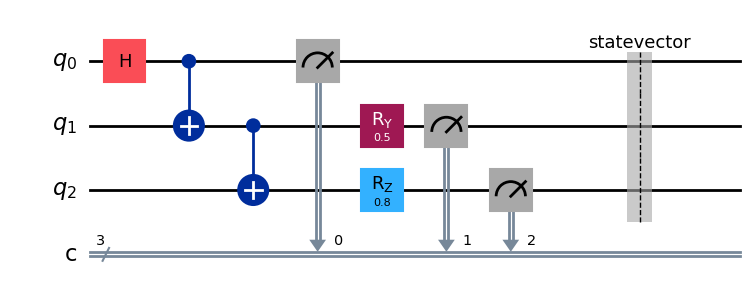

In [7]:
# Draw the quantum circuit
print("Quantum Circuit for QRAM:")
qc.draw('mpl')
plt.show()

In [8]:
# Use AerSimulator to get the statevector
simulator = AerSimulator()

In [9]:
# Transpile the circuit for the simulator
compiled_circuit = transpile(qc, simulator)

In [10]:
# Execute the circuit
job = simulator.run(compiled_circuit, shots=1024)

In [11]:
# Get the counts (measurement results)
counts = job.result().get_counts()

Measurement results:


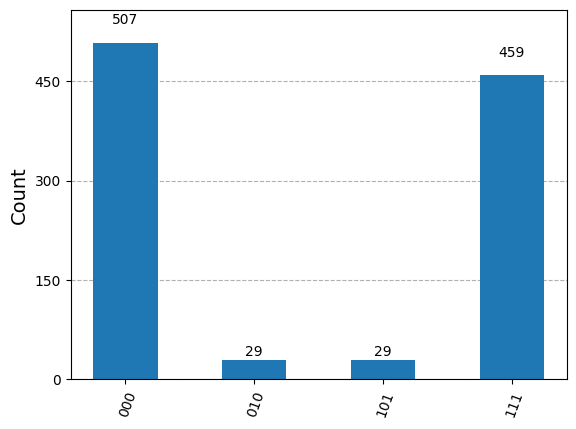

In [12]:
# Plot histogram of the results
print("Measurement results:")
plot_histogram(counts)
plt.show()

In [13]:
# Get the statevector of the final quantum state
statevector = job.result().get_statevector()

Bloch Sphere representation of the final quantum state:


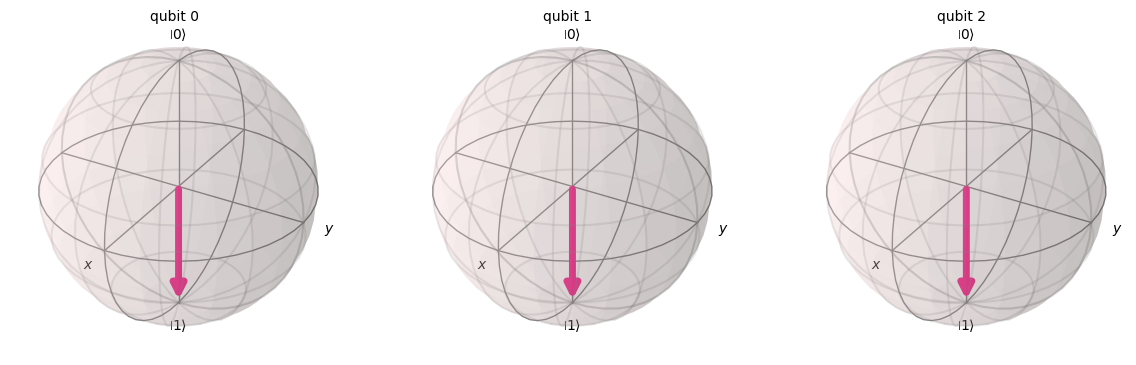

In [14]:
# Plot Bloch sphere representation of the quantum state
print("Bloch Sphere representation of the final quantum state:")
plot_bloch_multivector(statevector)
plt.show()